##  Project Objective

The objective of this project is to 
1. Using the data, come up with useful insights that can be used by each of the stores to improve in various areas.
2. Forecast the sales for each store for the next 12 weeks.

In [1]:
#importing neccessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
#importing dataset  
data = pd.read_csv("Walmart (1).csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### features
1. store = store number
2. Date = week of Sales
3. Weekly_Sales = Sales for a given store in that week 
4. Holiday_Flag = if ot is a holiday week 
5. Temperature = temperature on the day of sale 
6. Fuel_Price = Cost of the fuel in the region 
7. CPI = Consumer Price Index
8. unemployment = Unemployment Rate

In [3]:
data.shape # shape of the data

(6435, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
data.isnull().sum() # cheaking null values 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

our data has no null values

In [7]:
#statistical description of data 
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
#converting date column to datetime 
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

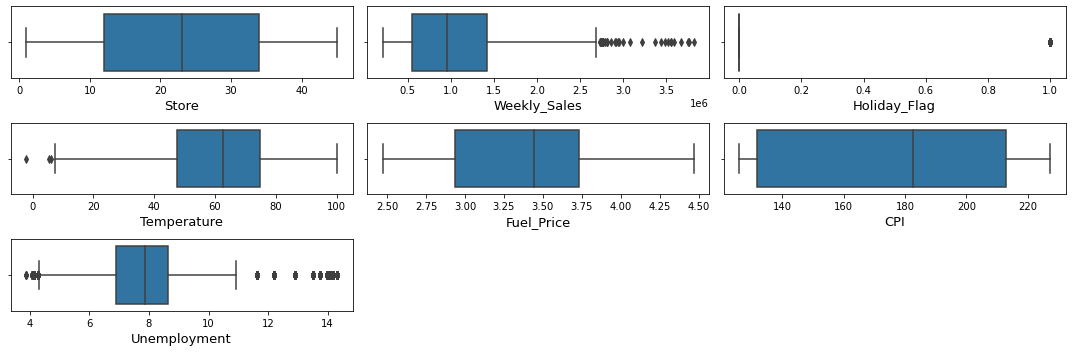

In [10]:
#plotting boxplot for cheaking outliers 
plt.figure(figsize = (15,5))

numeric_columns = data.select_dtypes(include='number').columns

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[column])
    plt.xlabel(column, fontsize=13)

plt.tight_layout()
plt.show()


* from above plots we can say that the outliers are present in the data  

In [11]:
# extracting year,month,day,hour from date column 
data['year'] = data["Date"].dt.year
data["month"] = data['Date'].dt.month
data["day"] = data["Date"].dt.day
data['hour'] = data['Date'].dt.hour

In [12]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,hour
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,0
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0


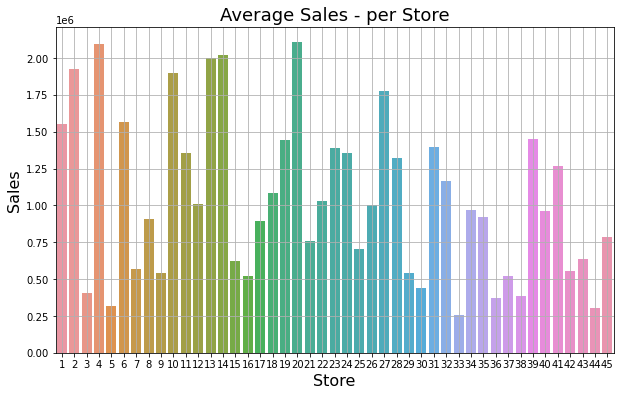

In [13]:
# pltting Average Sales - per Store
weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(10,6))
plt.style.use('default')
sns.barplot(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()


from the above bargraph we can see that 4th and 20 th store has high sales at the same time some of the stores performing very poor in terms of sales and some are performing well it means that sales are different in different stores

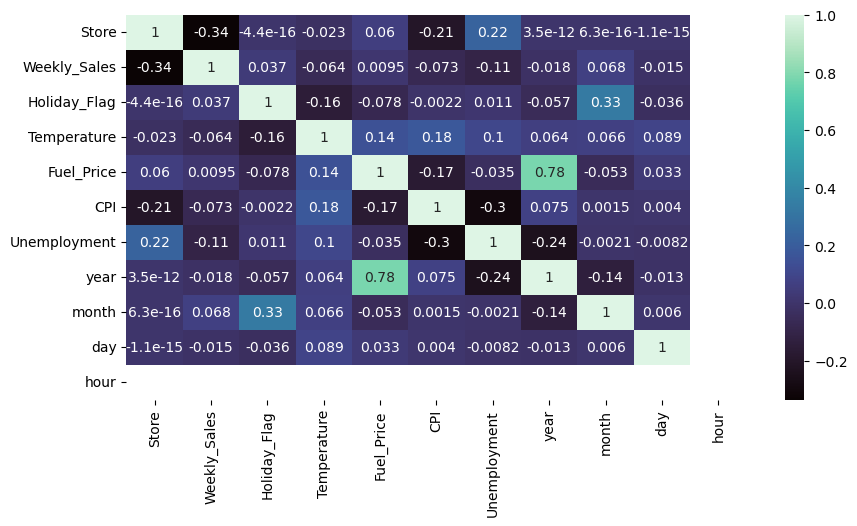

In [14]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,5))
sns.heatmap(data[list(data.columns)].corr(),cmap='mako', annot = True);

* * from above heatmap we can see that there is strong negative correlation between store and weekly sales , and there is also some lint of correlation in between store column and unemployment 

<AxesSubplot:xlabel='year', ylabel='Fuel_Price'>

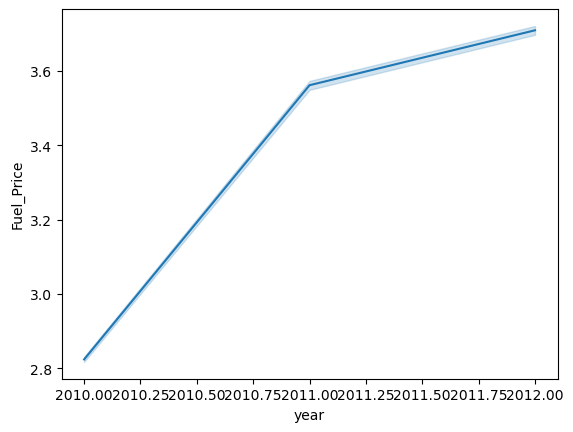

In [38]:
sns.lineplot(x= data['year'], y = data['Fuel_Price'])

* fuel prices have increased with time 

In [15]:
data["Store"].describe()

count    6435.000000
mean       23.000000
std        12.988182
min         1.000000
25%        12.000000
50%        23.000000
75%        34.000000
max        45.000000
Name: Store, dtype: float64

In [16]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

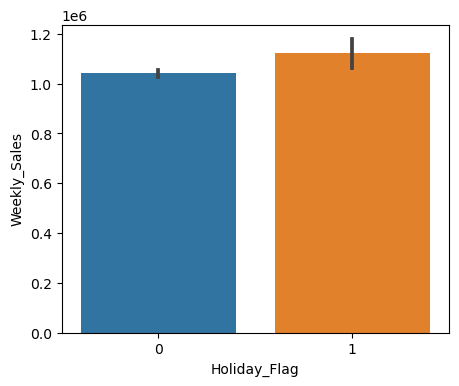

In [17]:
plt.figure(figsize = (5,4))
sns.barplot(x = data['Holiday_Flag'], y = data['Weekly_Sales']);

from above results we can say that there are less holidays but sales on holidays are more 

In [18]:
#removing outliers
import numpy as np

columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Q3 = data[columns].quantile(0.75)
Q1 = data[columns].quantile(0.25)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

for column in columns:
    data.loc[data[column] > UL[column], column] = UL[column]
    data.loc[data[column] < LL[column], column] = LL[column]


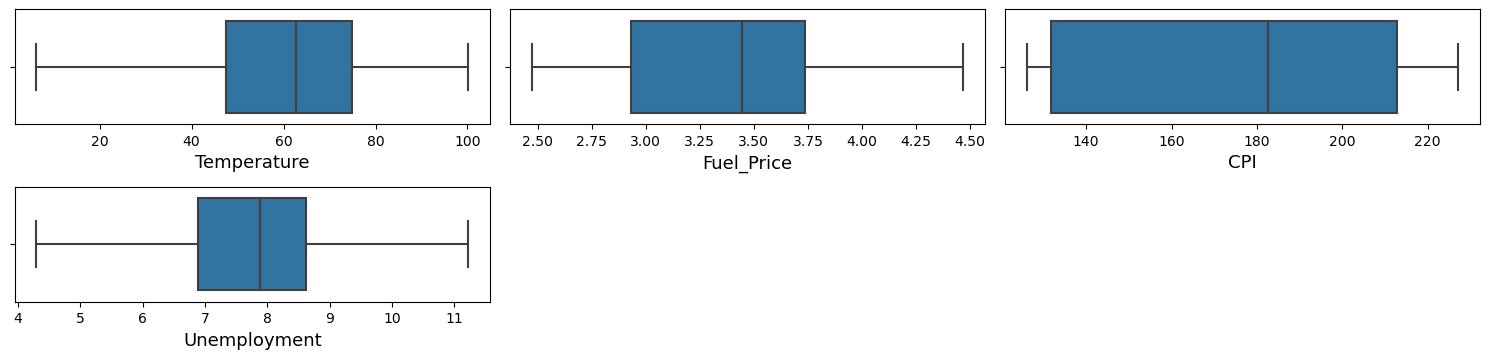

In [19]:
plt.figure(figsize = (15,5))

for i, column in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[column])
    plt.xlabel(column, fontsize=13)

plt.tight_layout()
plt.show()


now our input data is free from outliers 

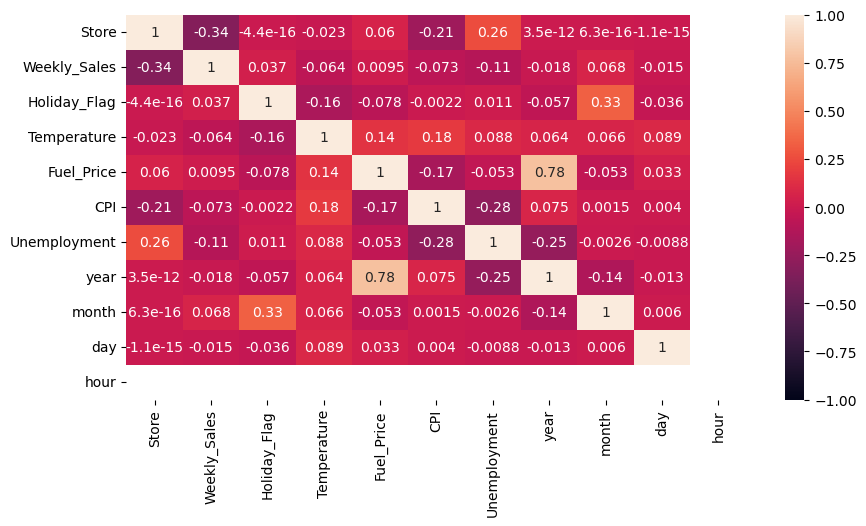

In [20]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True);

In [21]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,hour
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,0
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0


In [22]:
data.drop('Date', axis=1, inplace=True)

In [23]:
x = data.drop(['Weekly_Sales'], axis = 1)
y = data['Weekly_Sales']

In [24]:
y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.0522144522144522, random_state = 10)

In [26]:
print("x Train Shape :",x_train.shape)
print("x Val Shape   :",x_val.shape)
print("y Train Shape :",y_train.shape)
print("y Val Shape   :",y_val.shape)

x Train Shape : (6099, 10)
x Val Shape   : (336, 10)
y Train Shape : (6099,)
y Val Shape   : (336,)


### Applying linear regreesion model 

Linear regression is a statistical modeling technique used to analyze the relationship between a dependent variable and one or more independent variables. It assumes that there is a linear relationship between the independent variables and the dependent variable.

* Assumptions of Linear Regression:

* * Linearity: The relationship between the independent and dependent variables is linear.
* * Independence: The observations are independent of each other.
* * Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
* * Normality: The errors follow a normal distribution.
* * No Multicollinearity: The independent variables are not highly correlated with each other.
The Linear Regression Model:
The linear regression model can be represented by the equation:
Y = β0 + β1X1 + β2X2 + ... + βn*Xn + ε
where:
Y is the dependent variable
X1, X2, ..., Xn are the independent variables
β0, β1, β2, ..., βn are the regression coefficients (intercept and slopes)
ε is the error term

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)

In [28]:
data.reset_index()

,index,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,hour
0,0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,0
1,1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,0
2,2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,0
3,3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,0
4,4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,0
6431,6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,0
6432,6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,0
6433,6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,0


In [29]:
lr.score(x_val, y_val)

0.07378944594227432

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_pred, y_val)
r2 = r2_score(y_pred, y_val)
print('Mean Square Error = ', mse)
print('R2 Score = ', r2)

Mean Square Error =  323575410874.0726
R2 Score =  -6.506548472211278


### Decision Tree Regressor 

Decision Tree Regressor is a variant of decision trees that is specifically designed for regression tasks. It is a supervised learning algorithm that predicts continuous numeric values rather than discrete classes.
* * The feature space is divided into rectangular regions, similar to classification decision trees.
* * Each region represents a leaf node in the tree.
* * The prediction at each leaf node is the average (or weighted average) of the target values of the training samples that belong to that region.
* * The goal is to create regions that minimize the variance of the target variable within each region.

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_val)

In [32]:
rms_dt = np.sqrt(mean_squared_error(y_pred_dt, y_val))
r2_dt = r2_score(y_pred_dt, y_val)
print('RMSE of DT = ', rms_dt)
print('R2 Score of DT = ', r2_dt)

RMSE of DT =  155717.70784406268
R2 Score of DT =  0.9239416125868012


### Random Forest Regressor

Random Forest Regression is an ensemble learning method that combines multiple decision trees to create a powerful predictive model for regression tasks. It is a variation of the decision tree algorithm that addresses some of its limitations, such as overfitting and high variance. it uses baggig techniques 
* * Random Forest Regression addresses the issue of overfitting that can occur with decision trees by combining multiple trees and reducing their correlation, resulting in a more robust and generalized model.
* * Random Forest Regression can handle a large number of features without the need for feature selection, making it suitable for high-dimensional datasets.

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_val)

In [34]:
rms_rf = np.sqrt(mean_squared_error(y_pred_rf, y_val))
r2_rf = r2_score(y_pred_rf, y_val)
print('RMSE of RF = ', rms_rf)
print('R2 Score of RF = ', r2_rf)

RMSE of RF =  141639.00767512553
R2 Score of RF =  0.9342876513481851


### XG Boost Regreesor 

XGBoost Regressor is a powerful gradient boosting algorithm known for its efficiency, scalability, and high predictive performance. It combines weak prediction models (decision trees) using gradient boosting, includes regularization techniques to prevent overfitting, provides feature importance rankings, and supports parallel processing for faster training. It offers flexibility through hyperparameter tuning and custom objective functions. Overall, XGBoost Regressor is a versatile and accurate algorithm for regression tasks.

In [35]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_val)


In [36]:
xgb_rmse = np.sqrt(mean_squared_error(y_pred, y_val))
r2_xgb = r2_score(y_pred, y_val)
print('RMSE of RF = ', xgb_rmse)
print('R2 Score of RF = ', r2_xgb)

RMSE of RF =  96568.06495728997
R2 Score of RF =  0.9703527953340267


In [41]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
r2_scores = [r2 , r2_dt ,r2_rf , r2_xgb ]

summary_table = pd.DataFrame({'Model': model_names, 'R2_score': r2_scores}).sort_values('R2_score')
print(summary_table)


               Model  R2_score
0  Linear Regression -6.506548
1      Decision Tree  0.923942
2      Random Forest  0.934288
3            XGBoost  0.970353


 ##### Future Possibilities of the Project

 
Time Series Forecasting:- Time series models can be used to analyze historical sales data and make predictions for future sales based on patterns, trends, and seasonality. Techniques such as ARIMA, SARIMA, and Exponential Smoothing can be applied

### conclusion 

#### tried four regressor model here and among all of them XGboost regressor is giving high accuracy over 0.9703527953340267so our best model here is xgboost regressor 

### references 
* https://youtu.be/kS1SsTBRo4k
* https://youtu.be/FaAkauln_5w
* https://youtu.be/RAmzNhp6KUo
* https://github.com/mohan-aditya05/walmart_sales_forecasting/blob/master/Walmart%20Sales%20Forecast.ipynb
* https://www.kaggle.com/code/laskarpritam/walmart-sales-linear-dt-rf-regression